In [141]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [142]:
df = pd.read_csv('salary_cleaned.csv')

In [143]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Company_text,job_state,HQ,same_location,age,python_yn,R_yn,Spark_yn,AWS_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Tecolote Research\r\n,NM,CA,0,47,1,1,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,University of Maryland Medical System\r\n,MD,MD,0,36,1,1,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,KnowBe4\r\n,FL,FL,1,10,1,1,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,PNNL\r\n,WA,WA,1,55,1,1,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Affinity Solutions\r\n,NY,NY,1,22,1,1,0,0,1


In [144]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'provided', 'min_salary', 'max_salary', 'average',
       'Company_text', 'job_state', 'HQ', 'same_location', 'age', 'python_yn',
       'R_yn', 'Spark_yn', 'AWS_yn', 'excel_yn'],
      dtype='object')

In [145]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [146]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [147]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [148]:
df['seniority'] = df['Job Title'].apply(seniority)

In [149]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [150]:
# job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))


In [151]:
#Competitor count
df['Competitors_count'] = df['Competitors'].apply(lambda x:len(x.split(',')) if x != '-1' else 'NaN')

In [152]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,Spark_yn,AWS_yn,excel_yn,job_simp,seniority,desc_len,Competitors_count
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,1,0,0,1,data scientist,na,2555,NaN
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,1,0,0,0,data scientist,na,4828,NaN
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,1,1,0,1,data scientist,na,3495,NaN
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,1,0,0,0,data scientist,na,3926,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,1,0,0,1,data scientist,na,2748,3


In [153]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
5                      Digital Realty, CoreSite, Equinix
6                                                     -1
7                                                     -1
8                                                     -1
9                              Clicktripz, SmarterTravel
10                                                    -1
11                                                    -1
12                      Target, Costco Wholesale, Amazon
13                                                    -1
14                              Novartis, Baxter, Pfizer
15                                                    -1
16          bluebird bio, Agios Pharmaceuticals, Celgene
17                             

In [154]:
# hourly wage to annual consider 2000hrs work in year
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [155]:
df[df.hourly == 1] [['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [156]:
df['Company_text'] = df.Company_text.apply(lambda x: x.replace('\n', '') and x.split('\r')[0])

In [157]:
df['Company_text']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
5                                   CyrusOne
6                         ClearOne Advantage
7                                 Logic20/20
8                  Rochester Regional Health
9                                   <intent>
10                                      Wish
11                                   ManTech
12                                   Walmart
13                                    Yesler
14                    Takeda Pharmaceuticals
15                                   Audible
16                       Blueprint Medicines
17                                    h2o.ai
18                                      Nuna
19                        Pinnacol Assurance
20                                     Porch
21                                 Health IQ
22        

In [158]:
df.describe()

,Rating,Founded,hourly,provided,min_salary,max_salary,average,same_location,age,python_yn,R_yn,Spark_yn,AWS_yn,excel_yn,desc_len
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.358491,0.557951,46.591644,0.528302,0.981132,0.225067,0.237197,0.522911,3910.172507
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.885254,0.496965,53.778815,0.499535,0.136150,0.417908,0.425651,0.499812,1533.827777
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2834.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.000000,1.000000,24.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3781.500000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.000000,1.000000,59.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4772.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000


In [159]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'provided', 'min_salary', 'max_salary', 'average',
       'Company_text', 'job_state', 'HQ', 'same_location', 'age', 'python_yn',
       'R_yn', 'Spark_yn', 'AWS_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'Competitors_count'],
      dtype='object')

Text(0.5, 0.98, 'Rating')

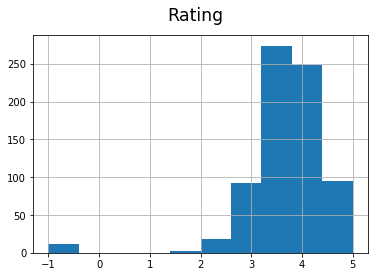

In [187]:
df.Rating.hist()
plt.suptitle('Rating', ha='center', fontsize='xx-large')

Text(0.5, 0.98, 'Average Salary')

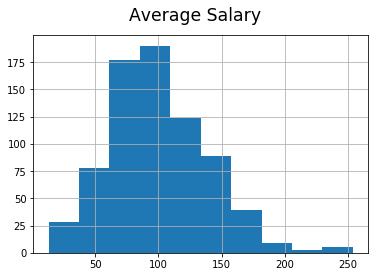

In [186]:
df.average.hist()
plt.suptitle('Average Salary', ha='center', fontsize='xx-large')

Text(0.5, 0.98, 'Company Age')

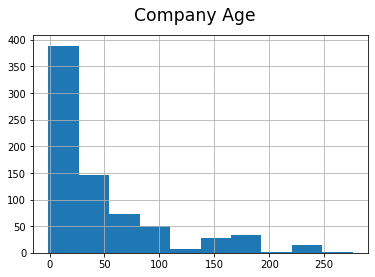

In [209]:
df.age.hist()
plt.suptitle('Company Age', ha='center', fontsize='xx-large')

Text(0.5, 0.98, 'Description Length (by character)')

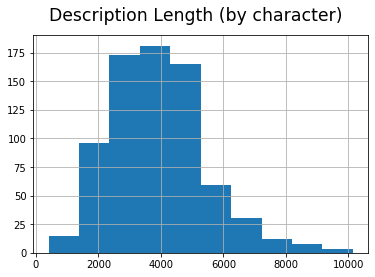

In [189]:
df.desc_len.hist()
plt.suptitle('Description Length (by character)', ha='center', fontsize='xx-large')

Text(0.5, 0.98, 'Company Age')

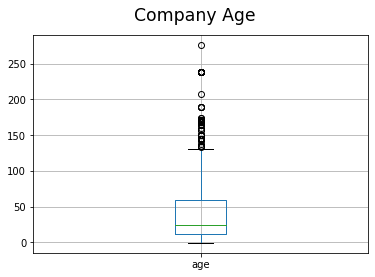

In [208]:
df.boxplot(column = ['age'])
plt.suptitle('Company Age', ha='center', fontsize='xx-large')

Text(0.5, 0.98, 'Average Salary(Annually)')

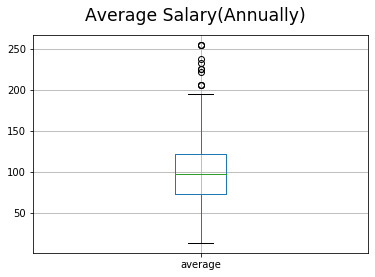

In [211]:
df.boxplot(column = ['average'])
plt.suptitle('Average Salary(Annually)', ha='center', fontsize='xx-large')

Text(0.5, 0.98, 'Rating')

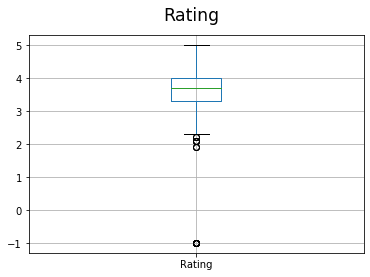

In [212]:
df.boxplot(column = ['Rating'])
plt.suptitle('Rating', ha='center', fontsize='xx-large')